## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
study_data["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Provide visual of duplicate mouse data.
duplicate_mice = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_refresh = study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=False, ignore_index=False)

#Checking the number of mice in the clean DataFrame.
study_data_refresh["Mouse ID"].describe()

count     1888
unique     249
top       p136
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [8]:
# Getting drug names and counts to verify groupby function performs correctly to gather statistical data later.
regimen_counts = study_data_refresh["Drug Regimen"].value_counts()
regimen_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [9]:
#Drugs are: Capomulin, Ramicane, Ketapril, Naftisol, Zoniferol, Stelasyn, Placebo, Ceftamin, Infubinol, and Propriva.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens = study_data_refresh.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
regimens

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

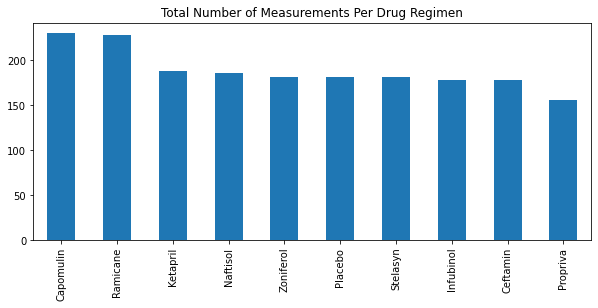

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_counts.plot(kind="bar", figsize=(10,4))

# Set a title for the chart
plt.title("Total Number of Measurements Per Drug Regimen")

plt.show()
plt.tight_layout()

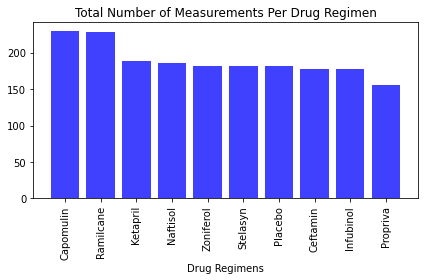

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = [ 1,2,3,4,5,6,7,8,9,10,]
counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
drugs = ["Capomulin", "Ramilcane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]
plt.bar(x_axis, counts, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation= '90')
plt.title("Total Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.tight_layout()

In [12]:
#Generate counts for following two pie plots.
sex = study_data_refresh["Sex"].value_counts()
sex

Male      958
Female    930
Name: Sex, dtype: int64

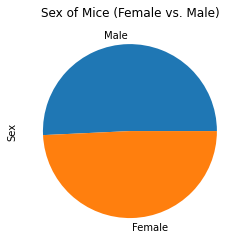

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot(kind="pie", figsize=(10,4))

# Set a title for the chart
plt.title("Sex of Mice (Female vs. Male)")

plt.show()
plt.tight_layout()

(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

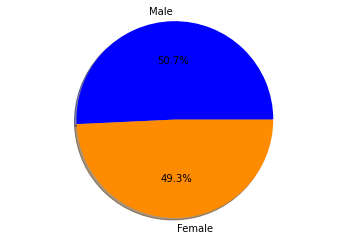

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["blue", "darkorange"]

#graph chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
top_drugs = study_data_refresh.set_index("Drug Regimen")
top_four = top_drugs.drop_duplicates(subset=["Mouse ID"], keep='last', inplace=False, ignore_index=False)
top_four_regimens = top_four.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
top_four_regimens

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,u364,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...
Ceftamin,x226,Male,23,28,0,45.000000,0
Ceftamin,x581,Female,19,28,45,64.634949,3
Ceftamin,x822,Male,3,29,45,61.386660,3


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_four = top_drugs.drop_duplicates(subset=["Mouse ID"], keep='last', inplace=False, ignore_index=False)
top_four

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Ramicane,g791,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
Stelasyn,z314,Female,21,28,5,45.934712,0
Propriva,z435,Female,12,26,10,48.710661,0
Infubinol,z581,Female,24,25,45,62.754451,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
